# Titanic disaster survival classification

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**[seaborn,matplotlib:data visualization],[pandas,numpy:calculation and data management]**

# DATASET

In [2]:
df=pd.read_csv('titanictrain.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Titanic dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

<AxesSubplot:>

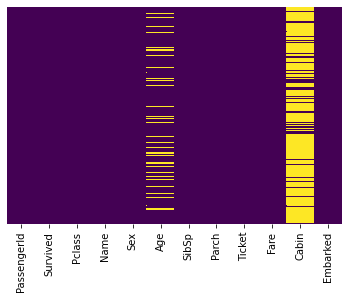

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)


**visualizing null values in the dataframe(dataset) : Age and Cabin have Null values**

<AxesSubplot:xlabel='Survived', ylabel='count'>

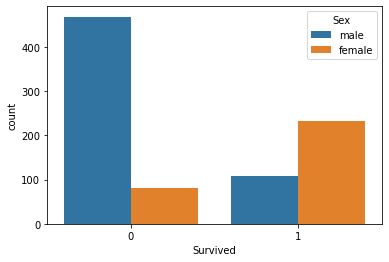

In [7]:
sns.countplot(x='Survived',data=df,hue='Sex')


**plot showing number of passengers survived(1) and dead(0) based on gender**

<AxesSubplot:xlabel='Survived', ylabel='count'>

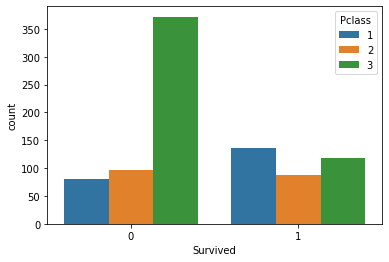

In [8]:
sns.countplot(x='Survived',data=df,hue='Pclass')


**plot showing number of passengers survived(1) and dead(0) based on Passenger Class**

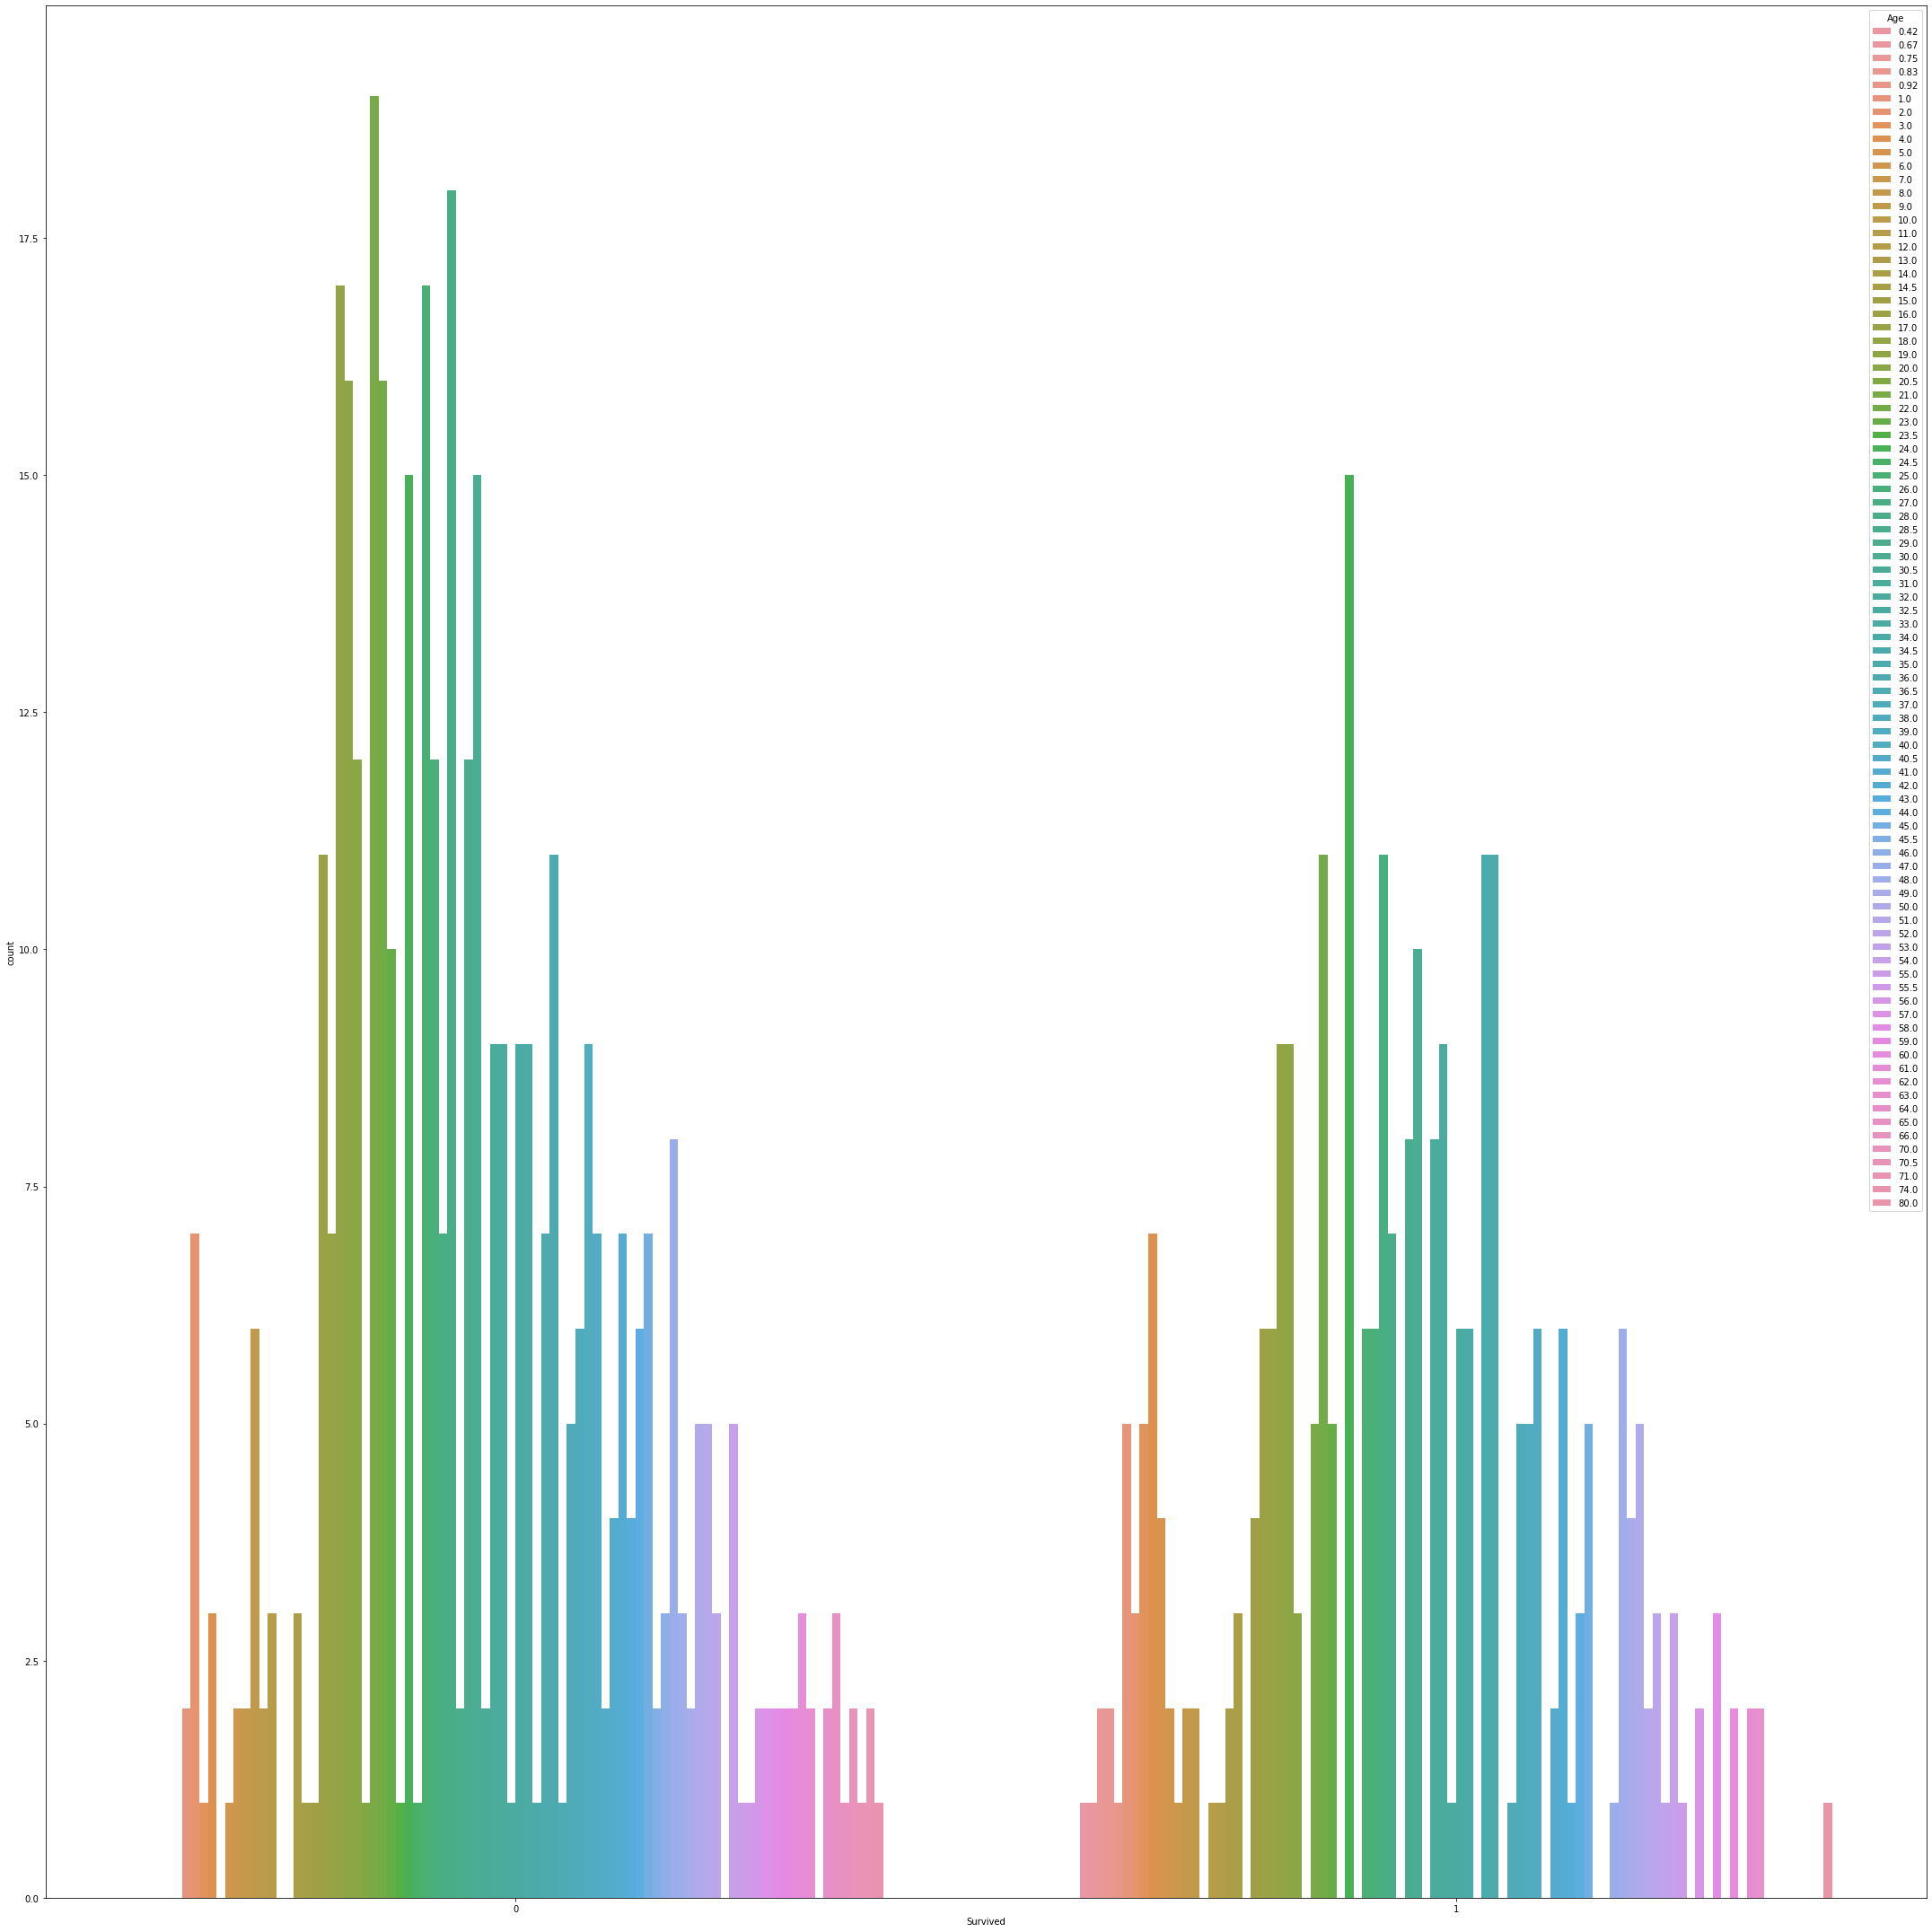

In [9]:
f=plt.figure(figsize=(30,30))
sns.countplot(x='Survived',data=df,hue='Age')
plt.tight_layout()

**plot showing number of passengers survived(1) and dead(0) based on Age**

<AxesSubplot:xlabel='Age'>

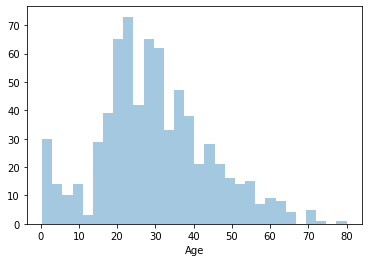

In [10]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)


**plot showing the age distribution**

<AxesSubplot:xlabel='SibSp', ylabel='count'>

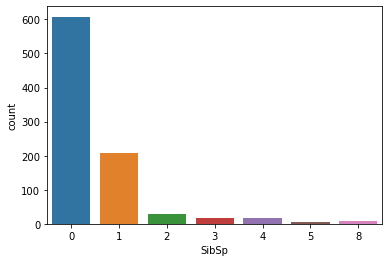

In [11]:
sns.countplot(x='SibSp',data=df)


**plot showing siblings distribution**

<AxesSubplot:>

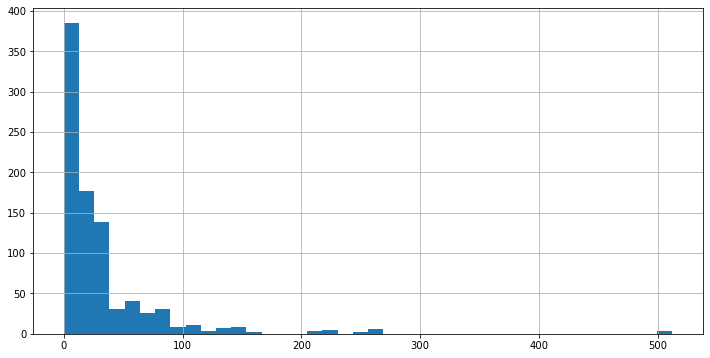

In [12]:
df['Fare'].hist(bins=40,figsize=(12,6))


**plot showing Fare distribution**

# Data Cleaning and Feature Engineering

In [13]:
df.drop(['Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


> **Removing Cabin column since it doesn't contribute in the classification process and also because this column has many null values**

<AxesSubplot:>

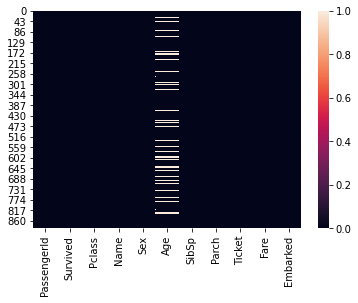

In [14]:
sns.heatmap(df.isnull())


**Null values distribution**

> # Functions for Feature Engineering

In [15]:
def acheck(cols):
    age=cols[0]
    pc=cols[1]
    
    if pd.isnull(age):
        if pc==1:
            return 37
        elif pc==2:
            return 29
        else:
            return 24
        
    else:
        return age
    
def echeck(cols):
    emb=cols[0]
    if emb=='S':
        return 1
    elif emb=='C':
        return 2
    elif emb=='Q':
        return 3
    else:
        return 9
def pcheck(cols):
    par=cols[0]
    if par==0:
        return 0
    elif par==1 or par==2 or par==3 or par==4:
        return 1
    elif par==5 or par==6:
        return 2
    else:
        return 3

In [16]:
df['Age']=df[['Age','Pclass']].apply(acheck,axis=1)

**missing values in Age column are filled using this function: acheck(...)**

In [17]:
df['Embarked']=df[['Embarked']].apply(echeck,axis=1)

**values in Embarked column are converted to numerical values**

In [18]:
df['Parch']=df[['Parch']].apply(pcheck,axis=1)

**values in Parch column are converted to numerical values**

<AxesSubplot:>

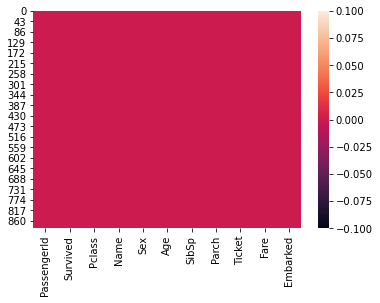

In [19]:
sns.heatmap(df.isnull())


**No Null values**

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


> #        pandas.get_dummies(...)


**Convert categorical variable into dummy/indicator variables**

In [21]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [22]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [23]:
Pc=pd.get_dummies(df['Pclass'],drop_first=True)

In [24]:
Pc

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [25]:
df=pd.concat([df,sex,Pc],axis=1)

**Concatenating the dataframe with new numerical columns**

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,1,0,1


In [27]:
y=df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Storing Survived column for training and testing purpose**

In [28]:
df.drop(['Sex','Ticket','Name','PassengerId','Pclass','Survived'],axis=1,inplace=True)

**Removing categorical columns as they have been replaced by respective numerical columns**

In [29]:
df.head(10)

,Age,SibSp,Parch,Fare,Embarked,male,2,3
0,22.0,1,0,7.2500,1,1,0,1
1,38.0,1,0,71.2833,2,0,0,0
2,26.0,0,0,7.9250,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0
4,35.0,0,0,8.0500,1,1,0,1
5,24.0,0,0,8.4583,3,1,0,1
6,54.0,0,0,51.8625,1,1,0,0
7,2.0,3,1,21.0750,1,1,0,1
8,27.0,0,1,11.1333,1,0,0,1
9,14.0,1,0,30.0708,2,0,1,0


In [30]:
df.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'male', 2, 3], dtype='object')

**Available columns for prediction model**

> # Dataset splitting

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y)

# Building Neural Network Model

In [33]:
from sklearn.neural_network import MLPClassifier

> # Neural Network Model from sklearn

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(512,), verbose = 1,activation='relu',solver='adam',warm_start=True)

An MLP (or Artificial Neural Network - ANN) with a single hidden layer 

In [35]:
mlp

MLPClassifier(hidden_layer_sizes=(512,), verbose=1, warm_start=True)

# Running/Fitting the Model

In [36]:
mlp.fit(X_train, Y_train)

Iteration 1, loss = 0.99279087
Iteration 2, loss = 0.80122670
Iteration 3, loss = 0.70597017
Iteration 4, loss = 0.68015247
Iteration 5, loss = 0.61232720
Iteration 6, loss = 0.57560538
Iteration 7, loss = 0.58341331
Iteration 8, loss = 0.55983700
Iteration 9, loss = 0.54596034
Iteration 10, loss = 0.53928180
Iteration 11, loss = 0.53031297
Iteration 12, loss = 0.54021191
Iteration 13, loss = 0.52051086
Iteration 14, loss = 0.51495919
Iteration 15, loss = 0.50949101
Iteration 16, loss = 0.50368766
Iteration 17, loss = 0.50115949
Iteration 18, loss = 0.49890049
Iteration 19, loss = 0.49072362
Iteration 20, loss = 0.48308109
Iteration 21, loss = 0.48225743
Iteration 22, loss = 0.47409701
Iteration 23, loss = 0.47027307
Iteration 24, loss = 0.46709642
Iteration 25, loss = 0.46224480
Iteration 26, loss = 0.46144477
Iteration 27, loss = 0.45638551
Iteration 28, loss = 0.45557207
Iteration 29, loss = 0.45653497
Iteration 30, loss = 0.45343812
Iteration 31, loss = 0.46621776
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(512,), verbose=1, warm_start=True)

# Gathering Predictions from the model

In [37]:

pred=mlp.predict(X_test)
print(pred)


[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1
 1]


# Accuracy and Classification report

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("accuracy=",accuracy_score(Y_test, pred))
print(classification_report(pred,Y_test))

accuracy= 0.7623318385650224
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       139
           1       0.68      0.70      0.69        84

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223

